<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/ml_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lesson 1: Introduction to Feature Engineering and Model Performance Assessment

Welcome to the first lesson of this week's data science bootcamp! In this lesson, we will cover the basics of feature engineering and model performance assessment. We'll also introduce you to the XGBoost model, which we will use throughout this week's lessons.

Feature engineering is a critical step in the machine learning pipeline. It involves transforming raw data into features that better represent the underlying problem and improve the performance of machine learning models. Model performance assessment is necessary to evaluate the effectiveness of our models and make informed decisions about how to improve them.

Welcome to the first lesson of this week's data science bootcamp! In this lesson, we will cover the basics of feature engineering and model performance assessment. We'll also introduce you to the XGBoost model, which we will use throughout this week's lessons.

Feature engineering is a critical step in the machine learning pipeline. It involves transforming raw data into features that better represent the underlying problem and improve the performance of machine learning models. Model performance assessment is necessary to evaluate the effectiveness of our models and make informed decisions about how to improve them.

Dataset Introduction
For this week's lessons, we will use the "House Prices: Advanced Regression Techniques" dataset from Kaggle. This dataset contains 79 features describing various aspects of residential homes in Ames, Iowa. Our goal is to predict the final sale price of each house using these features.

You can download the dataset [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).


Throughout the lessons, we will apply various feature engineering techniques and assess the performance of our XGBoost model on this dataset. In the next sections, we will dive deeper into the concepts of feature engineering and model performance assessment.

## Introduction to Feature Engineering
Importance of Feature Engineering
Feature engineering is an essential step in the machine learning pipeline. It helps in:

**Improving the performance of machine learning models**
* Reducing overfitting
* Enhancing model interpretability
* Reducing the computational cost of training models

 
**Common Feature Engineering Techniques **
* Feature Scaling and Transformation
* Handling Missing Values
* Handling Categorical Variables
* Feature Interaction and Polynomial Features
* Dimensionality Reduction



## Exploratory Data Analysis (EDA) and Feature Selection
**Correlation Analysis**
Correlation analysis helps identify the relationships between features in the dataset. Strongly correlated features can be removed or combined to reduce the dimensionality of the dataset, simplifying the model.


**Feature Importance using Decision Trees**
Feature importance can be computed using tree-based algorithms such as Decision Trees, Random Forests, or XGBoost. These models calculate the importance of each feature based on how much they contribute to improving the model's prediction accuracy.

## Feature Scaling and Transformation
**Standard Scaling**
Standard scaling, also known as Z-score normalization, scales the features to have a mean of 0 and a standard deviation of 1. This transformation is useful for algorithms that are sensitive to the scale of input features, such as linear regression or support vector machines.

**Min-Max Scaling**
Min-Max scaling scales the features to a specific range, typically [0, 1]. It is useful when the distribution of the data is not Gaussian, or when the minimum and maximum values of a feature are known.

**Log Transformation**
Log transformation is a technique used to stabilize variance, normalize the data, and reduce the effects of outliers. It is especially useful when dealing with data that has a skewed distribution.

**Power Transformation**
Power transformations, such as the Box-Cox or Yeo-Johnson methods, are used to stabilize variance, normalize data, and make data more Gaussian-like. These transformations are more flexible than log transformation, as they can handle zero and negative values.

## Model Performance Assessment
**Confusion Matrix**
A confusion matrix is a table that compares the actual and predicted classes for a classification problem. It is used to calculate various performance metrics like accuracy, precision, recall, and F1-score.

**Precision, Recall, and F1-Score**
Precision, recall, and F1-score are metrics used to evaluate the performance of classification models. Precision measures the proportion of true positive predictions among all positive predictions, recall measures the proportion of true positive predictions among all actual positive instances, and the F1-score is the harmonic mean of precision and recall.

**ROC Curve and AUC**
The ROC curve (Receiver Operating Characteristic) plots the true positive rate (recall) against the false positive rate for different classification thresholds. AUC (Area Under the Curve) is a single value summarizing the performance of the classifier. A higher AUC indicates better classifier performance.

**Cross-Validation**
Cross-validation is a technique used to evaluate the performance of machine learning models by dividing the dataset into multiple folds and assessing the model on each fold. This method helps to reduce overfitting and provides a more accurate estimation of the model's performance on unseen data.

## Coding Examples

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline


In [12]:
# Load the dataset
train = pd.read_csv('https://raw.githubusercontent.com/SSSpock/skillspire/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/SSSpock/skillspire/main/train.csv')

# Explore the dataset
train.head()
train.describe()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<ipython-input-5-3e4533c6fbeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

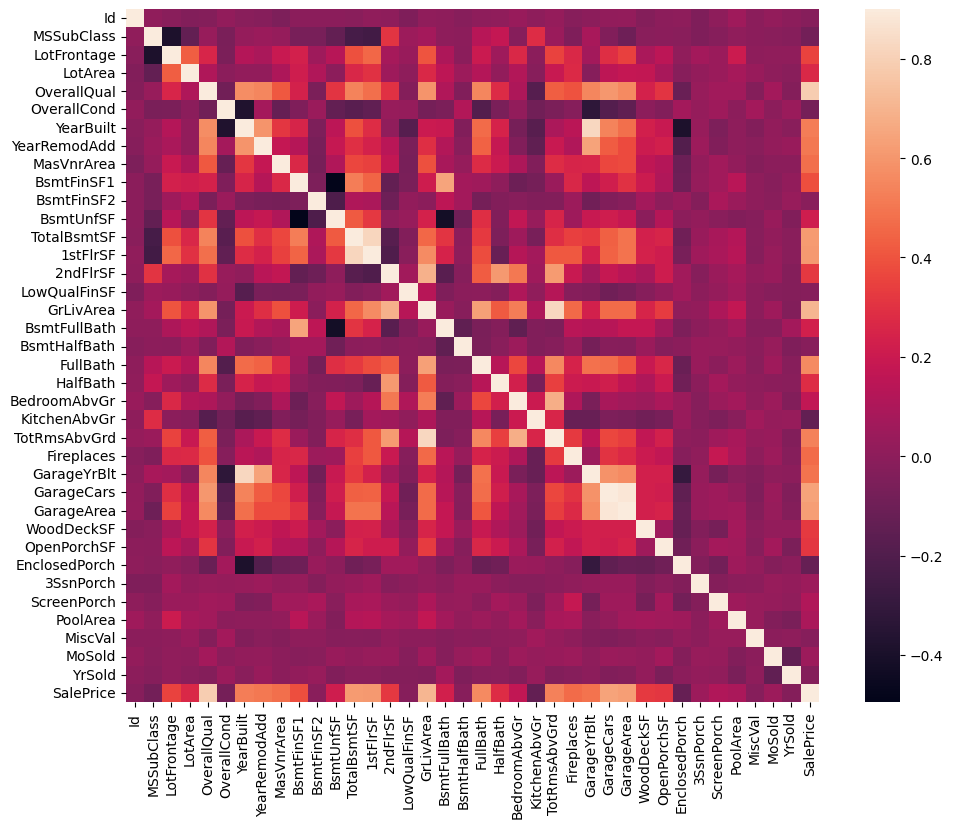

In [ ]:
# Correlation heatmap
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


In [15]:
# Prepare the data
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

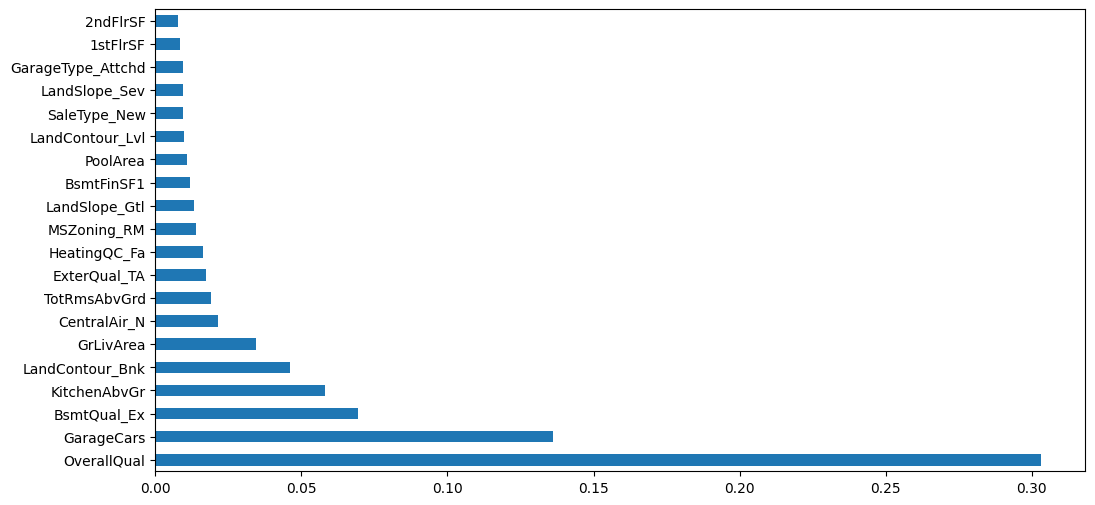

In [ ]:
# Train an XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [29]:
X_train[feat_importances.nlargest(20).index]

,OverallQual,GarageCars,BsmtQual_Ex,KitchenAbvGr,LandContour_Bnk,GrLivArea,CentralAir_N,TotRmsAbvGrd,ExterQual_TA,HeatingQC_Fa,MSZoning_RM,LandSlope_Gtl,BsmtFinSF1,PoolArea,LandContour_Lvl,SaleType_New,LandSlope_Sev,GarageType_Attchd,1stFlrSF,2ndFlrSF
254,5,1,0,1,0,1314,0,5,1,0,0,1,922,0,1,0,0,1,1314,0
1066,6,2,0,1,0,1571,0,7,0,0,0,1,0,0,1,0,0,1,799,772
638,5,0,0,1,0,796,0,4,1,0,0,1,0,0,1,0,0,0,796,0
799,5,1,0,1,0,1768,0,7,1,0,0,1,569,0,1,0,0,0,981,787
380,5,1,0,1,0,1691,0,6,1,0,0,1,218,0,1,0,0,0,1026,665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,0,1,0,1314,0,6,0,0,0,1,24,0,1,0,0,1,1314,0
1130,4,2,0,1,0,1981,0,7,1,0,0,1,622,0,1,0,0,0,1328,653
1294,5,2,0,1,0,864,0,5,1,0,0,1,167,0,1,0,0,0,864,0
860,7,1,0,1,0,1426,0,7,0,0,0,1,0,0,1,0,0,0,912,514


In [20]:
# Standard scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [21]:
# Min-Max scaling
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)


In [22]:
# Train an XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train_std, y_train)

# Predictions
y_pred = xgb.predict(X_test_std)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Squared Error: 867190334.8427968
Mean Absolute Error: 17011.535009096748
R2 Score: 0.886942183237235


In [23]:
# Cross-validation
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

cv_scores = cross_val_score(xgb_pipeline, X_encoded, y, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean R2 score: {np.mean(cv_scores)}")


Cross-validation R2 scores: [0.89778209 0.83497966 0.85129979 0.8939537  0.86812188]
Mean R2 score: 0.86922742366609


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Perform a grid search
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_encoded, y)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
cv_scores_best = cross_val_score(best_model, X_encoded, y, cv=5, scoring='r2')

print(f"Cross-validation R2 scores (best model): {cv_scores_best}")
print(f"Mean R2 score (best model): {np.mean(cv_scores_best)}")


Best hyperparameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 300}
Cross-validation R2 scores (best model): [0.90442141 0.85122987 0.89917797 0.86874483 0.89187542]
Mean R2 score (best model): 0.8830898988793494


In [25]:
# Train the optimized XGBoost model
optimized_xgb = XGBRegressor(
    n_estimators=best_params['model__n_estimators'],
    learning_rate=best_params['model__learning_rate'],
    max_depth=best_params['model__max_depth']
)

xgb_pipeline_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('model', optimized_xgb)
])

xgb_pipeline_optimized.fit(X_train, y_train)

# Predictions
y_pred_optimized = xgb_pipeline_optimized.predict(X_test)

# Evaluate the optimized model performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Mean Squared Error (optimized model): {mse_optimized}")
print(f"Mean Absolute Error (optimized model): {mae_optimized}")
print(f"R2 Score (optimized model): {r2_optimized}")


Mean Squared Error (optimized model): 915444757.7894503
Mean Absolute Error (optimized model): 16646.069483090752
R2 Score (optimized model): 0.8806511309868836


Questions to Test Students' Understanding
Why is feature engineering important in machine learning?

* Explain the difference between label encoding and one-hot encoding. When should you use each method?

* How can you use feature scaling to improve model performance? Name and describe two common scaling methods.

* What is the role of hyperparameter tuning in improving model performance?

* What is cross-validation, and why is it important in model assessment?

* What are the advantages of using ensemble methods like XGBoost over simpler models like linear regression?

* How can you use feature importance from an XGBoost model to guide feature selection?

* Describe the steps you would take to perform a comprehensive feature engineering process on a new dataset.

* Explain how to use regularization to prevent overfitting in your model.

* What are some common techniques for feature transformation, and how do they help improve model performance?